<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1>Técnicas de Inteligencia Artificial</header1></center>
<left><h1>Actividad 1. Laboratorio: Árboles de decisión, reglas y ensemble learning</header1></left>

**Presentado por:** Henry Alejandro Gerena Ricardo <br>
**Fecha:** 09/12/2025

## Importación de librerias necesarias

In [1]:
#Para esta actividad se importarán las siguientes librerías:

# --------------------------
# 1.1. Librerías utilizadas
# --------------------------

# Librerías para manipulación de datos
import numpy as np
import pandas as pd

# Librerías para data viz
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías de Scikit-learn para modelado y evaluación
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay,
    f1_score
)

print("Librerías importadas correctamente.")

Librerías importadas correctamente.


In [2]:
# -------------------------------------
# 1.2. versión de Librerías utilizadas
# -------------------------------------
import matplotlib, sklearn

print("numpy:", np.__version__)
print("pandas:", pd.__version__)
print("matplotlib:", matplotlib.__version__)
print("seaborn:", sns.__version__)
print("scikit-learn:", sklearn.__version__)

numpy: 2.2.6
pandas: 2.3.3
matplotlib: 3.10.7
seaborn: 0.13.2
scikit-learn: 1.7.2


## Cargar el Dataset

El dataset utilizado fue tomado de la siguiente dirección: [**Dataset - Car Evaluation**](https://archive.ics.uci.edu/dataset/19/car+evaluation)

In [3]:
#Código para cargar el Dataset

# ---------------------------------------------------
# 2. Cargar el dataset - Laboratorio_dataset_car.csv 
# ---------------------------------------------------
url = 'https://raw.githubusercontent.com/oscar-unir/TIA/main/datasets/car/Laboratorio_dataset_car.csv'
df_car = pd.read_csv(url,
                     sep = ';')

print("Dimensiones del dataset:", df_car.shape)
df_car.head()

Dimensiones del dataset: (1750, 7)


,Buying,Maintenance,Doors,Person,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## Explique el problema a resolver. 
Descripción del problema. Tipo de problema (justifique). Variable objetivo, variables de entrada. Utilidad de su posible solución. Elementos adicionales que considere relevantes:

### <span style="color:green"> 3.1. **¿Qué problema vamos a resolver?** </span>
---

Resolveremos un **problema de clasificación**, el objetivo específico es **predecir el nivel de elegibilidad de un coche (`class`)** a partir de *características conocidas* del coche como (precio de compra, coste de mantenimiento, número de puertas, capacidad, tamaño del maletero y nivel de seguridad). 
  - La variable objetivo *(target)* `class` es categórica y puede tomar uno de estos valores:
    - `vgood`: muy bueno
	- `good`: bueno
	- `acc`: aceptable
	- `unacc`: inaceptable

> Utilizaremos modelos de clasificación basados en **árboles de decisión** y **técnicas ensemble (Random Forest)**.

### <span style="color:green"> 3.2. **Descripción del tipo de problema** </span>
---

- **Tipo de problema**:  
  - Es de **aprendizaje supervisado**, porque disponemos de ejemplos históricos donde conocemos tanto las características de los coches como la clase asignada (`class`).
  - Adicionalmente, es un **problema de clasificación multiclase**, ya que la variable objetivo tiene **más de dos** categorías (`vgood` ,`good` ,`acc` ,`unacc`).

- **Variables del dataset**:

| Variable | Tipo | Descripción | Posibles valores |
|----------|------|-------------|------------------|
| `Buying` | Categórica | Coste de compra del coche | `vhigh` (Muy alto) <br> `high` (Alto) <br> `med` (Medio) <br> `low` (Bajo) |
| `Maintenance` | Categórica | Coste de mantenimiento del coche | `vhigh`, `high`, `med`, `low` |
| `Doors` | Categórica | Número de puertas del coche | `2`, `3`, `4`, `5more` |
| `Person` | Categórica | Capacidad de personas en el coche | `2`, `4`, `more` |
| `lug_boot` | Categórica | Tamaño del maletero del coche | `small`, `med`, `big` |
| `safety` | Categórica | Nivel de seguridad del coche | `low`, `med`, `high` |
| **`class`**| <span style="color:green"> Categórica </span> | <span style="color:green"> **Variable objetivo**: Elegibilidad del coche </span>  | `unacc` (inaceptable) <br> `acc` (aceptable) <br> `good` (bueno) <br> `vgood` (muy bueno) |

### <span style="color:green"> 3.3. **Usabilidad de la solución** </span>
---

Un modelo capaz de predecir la aceptabilidad de un vehiculo a partir de sus características puede ser útil para:

- **Asistir en la toma de decisiones de compra** a clientes o asesores comerciales, recomendando coches más adecuados según criterios de coste, capacidad, seguridad y calidad global.
- **Sistemas de recomendación** en portales de venta de coches, que ordenen o filtren vehículos en función de su aceptabilidad estimada.
- **Análisis de políticas de producto**, ayudando a fabricantes o concesionarios a entender qué combinaciones de características tienden a producir coches mejor valorados (`good` o `vgood`).

> **En resumen, el modelo puede apoyar decisiones rápidas y consistentes a partir de datos estructurados sobre los vehículos.**

## Caracterización del Dataset

Se incluye una descripción de los datos con:

>- Número de clases de la variable objetivo, indicando que representan dichas clases y el tipo de valor que toman.
>- Número de instancias en total.
>- Número de instancias pertenecientes a cada clase.
>- Número de atributos de entrada, su significado y tipo.
>- ¿Hay algún valor de atributo desconocido?

Se incorporá una descripción (EDA) del conjunto de datos utilizado. Se analiza el dataset proporcionando, se muestra al menos algunas de sus características mediante tablas y al menos algunas de ellas en modo gráfico (p.ej., histogramas, diagramas de dispersión, diagramas de cajas y bigotes, etc.)

In [4]:
#Código que responde a la descripción anterior

# ------------------------------------------------
# 4.1. Exploración de datos del dataset
# ------------------------------------------------

print(f"\n(1). Dimensiones del dataset:  {df_car.shape}")
print(f"(2). Número Total de Instancias: {df_car.shape[0]}")
print(f"(3). Número Total de Variables:  {df_car.shape[1]}")

# Primeras 5 instancias
print(f"\n(4). Primeras 5 Instancias del dataset:")
df_car.head()


(1). Dimensiones del dataset:  (1750, 7)
(2). Número Total de Instancias: 1750
(3). Número Total de Variables:  7

(4). Primeras 5 Instancias del dataset:


,Buying,Maintenance,Doors,Person,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
# Estadisticos generales del dataset
print(f"\n(5). Estadísticos generales del dataset:")
df_car.describe(include="all")


(5). Estadísticos generales del dataset:


,Buying,Maintenance,Doors,Person,lug_boot,safety,class
count,1750,1750,1750,1750,1750,1750,1750
unique,4,4,4,3,3,3,4
top,vhigh,low,2,4,big,high,unacc
freq,443,447,444,587,585,590,1215


In [6]:
# Se reducen las varaibles con nombre largo
# , y que tiene capitalización
print(f"\n(6). Renombrar las variables para mejor manejo:\n")
df_car.columns = ['buying', 
                  'maint', 
                  'doors', 
                  'persons', 
                  'lug_boot', 
                  'safety', 
                  'class']
print(df_car.columns)


(6). Renombrar las variables para mejor manejo:

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')


In [7]:
# Comprobación de valores nulos
print("\n(7). Comprobación de valores nulos por atributo:")
print(df_car.isnull().sum())


(7). Comprobación de valores nulos por atributo:
buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64


In [8]:
# Filas duplicadas
print(f"\n(8). Comprobación de valores duplicados:")
print(int(df_car.duplicated().sum()))


(8). Comprobación de valores duplicados:
23


In [9]:
# Información general del dataset
print(f"\n(9). Información general del dataset:\n")
df_car.info()


(9). Información general del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1750 non-null   object
 1   maint     1750 non-null   object
 2   doors     1750 non-null   object
 3   persons   1750 non-null   object
 4   lug_boot  1750 non-null   object
 5   safety    1750 non-null   object
 6   class     1750 non-null   object
dtypes: object(7)
memory usage: 95.8+ KB


> <span style="color:green"> **Primer resumen de los datos** </span>
>  - El dataset contiene **1,750 instancias** y **7 variables**.
>  - Todas las variables son de tipo de dato **categórico** y tienen entre 3 y 4 posibles clases, representadas como texto.
>  - No se observan **valores perdidos o desconocidos** en ninguna columna.
>  - Se observar **23 instancias duplicadas** que podrían eliminarse.
>  - Se observan que **1,215 instancias** en la **variable objetivo** que estan asignadas a la clase `unacc`, indicando una *distribución desequilibrada*.
>  - La variable objetivo *(target)* es `class`.

In [10]:
# Aplicar funcion lambda con strip a todas las columnas de texto
df_car = df_car.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

print("\n(10). Comprobación de valores nulos despues de aplicar 'strip' por clase:")
print(df_car.isnull().sum())


(10). Comprobación de valores nulos despues de aplicar 'strip' por clase:
buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64


In [11]:
# Eliminar duplicados y mantener la primera aparición
df_car = df_car.drop_duplicates(keep='first')

# Verificar que ya no haya duplicados
print("(11). Comprobación de valores después de limpiar:", df_car.duplicated().sum())

(11). Comprobación de valores después de limpiar: 0


In [12]:
# Resetear el índice y eliminar el antiguo
df_car = df_car.reset_index(drop=True)

print(f"\n(12). Información general después limpiar el dataset:\n")
df_car.info()


(12). Información general después limpiar el dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [13]:
# 1.1 DataFrame con conteos de todas las variables categóricas
# excluyendo la variable objetivo (class)
df_counts = pd.DataFrame(columns=['Variable', 'Clase', 'Conteo'])

for col in df_car.columns:
    counts = df_car[col].value_counts().reset_index()
    counts.columns = ['Clase', 'Conteo']
    counts['Variable'] = col
    df_counts = pd.concat([df_counts, counts], ignore_index=True)

# Excluir 'class' al mostrar
print("\n(13). Número de instancias pertenecientes a cada clase (excluyendo 'class'):")
display(df_counts[df_counts['Variable'] != 'class'])


(13). Número de instancias pertenecientes a cada clase (excluyendo 'class'):


,Variable,Clase,Conteo
0,buying,high,432
1,buying,med,432
2,buying,low,432
3,buying,vhigh,431
4,maint,high,432
5,maint,med,432
6,maint,low,432
7,maint,vhigh,431
8,doors,2,432
9,doors,4,432


In [14]:
# 1.2 Conteo y porcentaje de la variable objetivo 'class'
print("(14.1). Número de clases de la variable objetivo 'class':")
print(df_car['class'].value_counts())

print("\n(14.2) Representación porcentual de cada clase:")
print(df_car['class'].value_counts(normalize=True).round(2))

(14.1). Número de clases de la variable objetivo 'class':
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

(14.2) Representación porcentual de cada clase:
class
unacc    0.70
acc      0.22
good     0.04
vgood    0.04
Name: proportion, dtype: float64


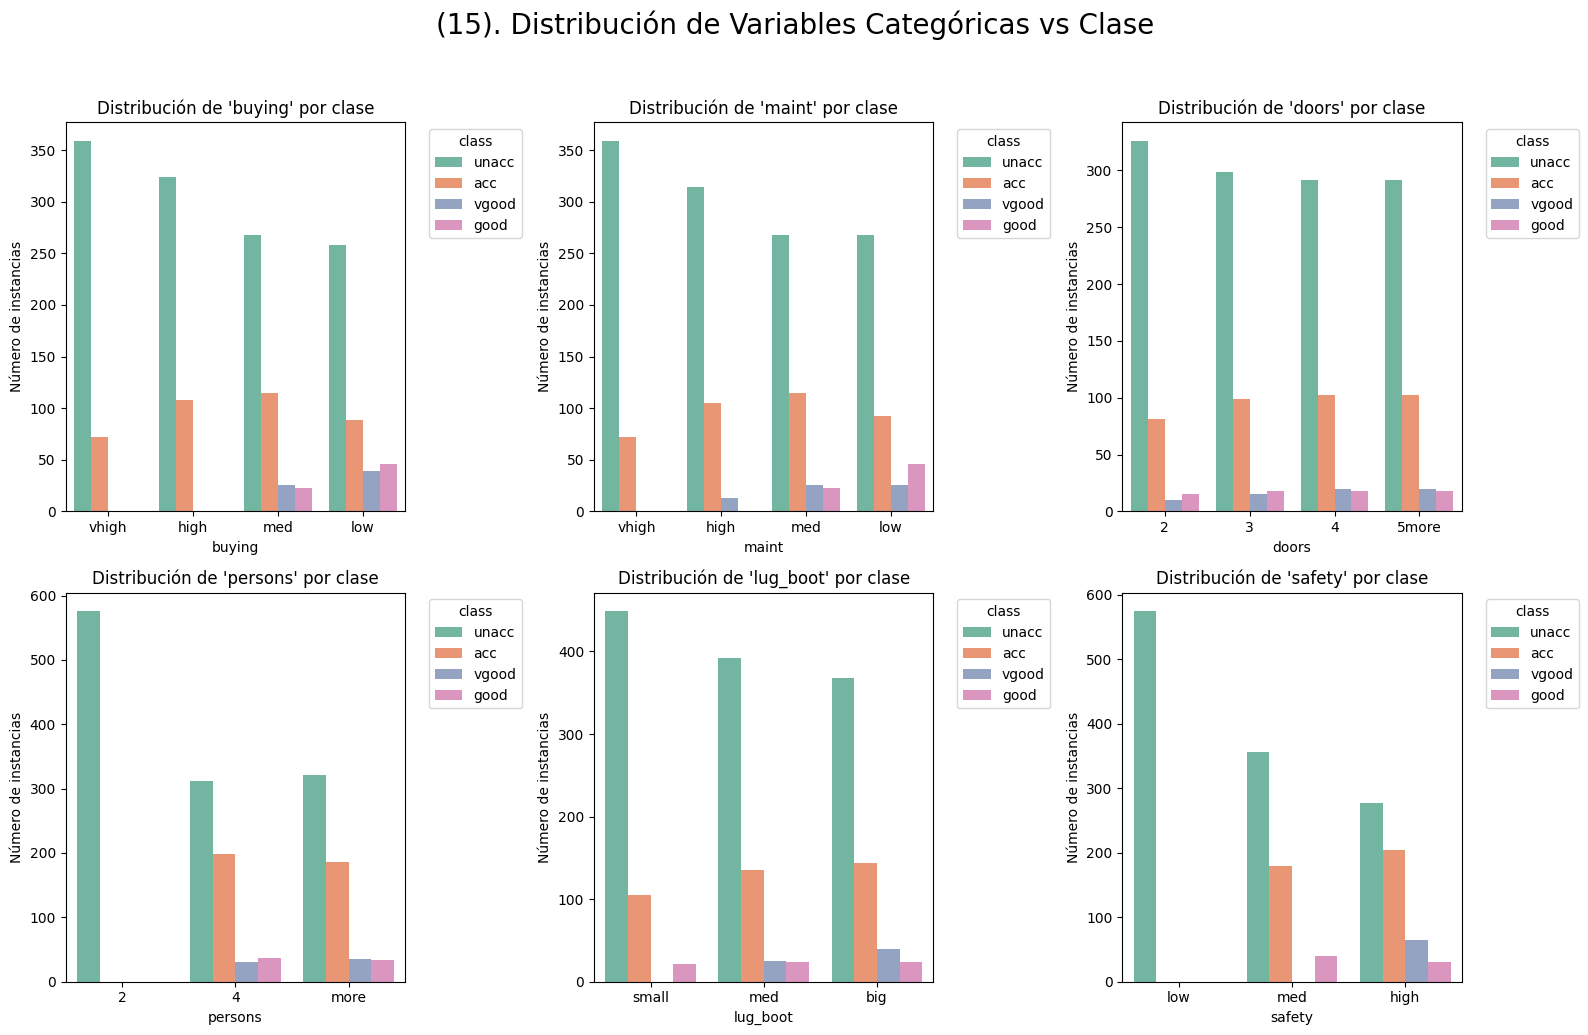

In [15]:
# Lista de variables categóricas (excluyendo 'class')
categorical_cols = [col for col in df_car.columns if col != 'class']

# Crear una figura para todos los gráficos
plt.figure(figsize=(16, 10))

# Título de la grafica
plt.suptitle("(15). Distribución de Variables Categóricas vs Clase", fontsize=20, y=1.03)

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)  # cantidad de variables
    sns.countplot(data=df_car, x=col, hue='class', palette='Set2')
    plt.title(f"Distribución de '{col}' por clase")
    plt.xlabel(col)
    plt.ylabel("Número de instancias")
    plt.legend(title='class', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

En un par de párrafos haga un resumen de los principales hallazagos encontrados:    

<span style="color:green"> **Resumen** </span>

- La clase objetivo (`class`) tiene cuatro niveles: `unacc` (inaceptable), `acc` (aceptable), `good` (bueno) y `vgood` (muy bueno) y las caracteristicas de entrada describen el coche en cuestión de coste de compra y mantenimiento (`buying`, `maint`), las características físicas del coche (`doors`, `persons`, `lug_boot`) y su nivel de seguridad (`safety`).

- La **distribución de clases** no es equilibrada: `unacc` es la más frecuente, mientras que `good` y, sobre todo, `vgood` son muy poco frecuentes, y este desequilibrio que puede afectar al rendimiento de los modelos, especialmente en las clases con menos ejemplo.

- Se han utilizado apoyo visual principalmente graficos de barras de conteo (countplot), para visualizar la relación entre las variables categóricas y la clase, puesto que son especialmente adecuados para visualizar la distribución de variables categoricas, podemos observar los sigueintes puntos:
  - El número de coches aceptables tiende a aumentar a medida que el coste de compre disminuye.
  - La capacidad tiene un impacto significativo en los coches con ocupación para solo **2 personas**, en su mayoría se consideran inaceptables.
  - La seguridad es un factor determinante para la aceptación del coche, los coches con seguridad baja casi siempre se clasifican como inaceptables.

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación


(1). Dimensiones del modelo:
Dimensiones de X: (1727, 6)
Dimensiones de y: (1727,)


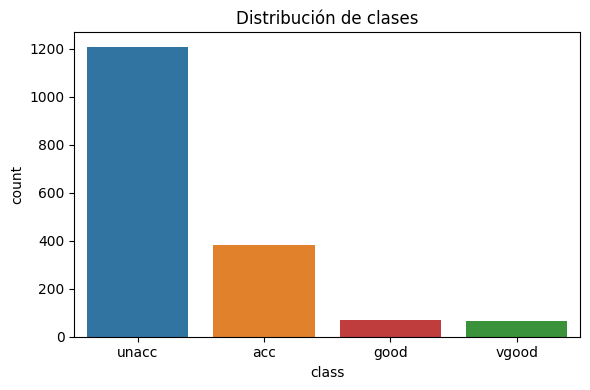

In [16]:
#Código que realice las transformaciones necesarias para poder realizar los procesos de modelación. Ej.One hot enconding

# Creamos un dataframe para el proceso de modelado, 
# sin manipular el dataset ya limpio
df_car_model = df_car.copy()

# Separación de atributos (X) y variable objetivo (y)
X = df_car_model.drop('class', axis=1)
y = df_car_model['class']

print(f"\n(1). Dimensiones del modelo:")
print(f"Dimensiones de X: {X.shape}")
print(f"Dimensiones de y: {y.shape}")

y.value_counts(normalize=True).round(2)
class_counts = df_car['class'].value_counts()

# Gráficos
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=df_car, order=class_counts.index, hue='class')
plt.title('Distribución de clases')
plt.tight_layout()
plt.show()


## División del dataset en datos de entrenamiento y datos de test 

In [17]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evluación planeada. Describa cuál es.

# Semilla utilizada
SEED = 123

# 80% para train y 20% para test 
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.20,
                                                    random_state = SEED,
                                                    stratify = y   # esto mantiene proporciones de clase objetivo
                                                    )

<span style="color:green"> **Estrategia implementada** </span>
- Se Utilizó la **estrategia de división:** (80% para entrenamiento y 20% para prueba). 
- Se ha aplicado `stratify = y` para mantener las proporciones de **clases** equilibradas al momento de realizar la partición de datos, es importante teniendo en cuenta el desbalanceo entre clases.
- Se estableció una semilla con el valor `123` para asegurar la *reproducibilidad* en futuras ejecuciones.

In [18]:
# Validar las dimensiones optenidas
print(f"\n(2). Validar las dimensiones optenidas:")
print('Valores X:', X_train.shape, X_test.shape)
print('Valores y:', y_train.shape, y_test.shape,"\n")

print(y.value_counts(normalize=True))
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))


(2). Validar las dimensiones optenidas:
Valores X: (1381, 6) (346, 6)
Valores y: (1381,) (346,) 

class
unacc    0.700058
acc      0.222351
good     0.039954
vgood    0.037638
Name: proportion, dtype: float64
class
unacc    0.700217
acc      0.222303
good     0.039826
vgood    0.037654
Name: proportion, dtype: float64
class
unacc    0.699422
acc      0.222543
good     0.040462
vgood    0.037572
Name: proportion, dtype: float64


In [19]:
# Visualizar los datos para comprobar que este correctos
print(f"\n(3). Visualización de los datos de entrenamiento:")
X_train.head()


(3). Visualización de los datos de entrenamiento:


,buying,maint,doors,persons,lug_boot,safety
579,high,high,3,4,med,med
400,vhigh,low,4,more,med,high
85,vhigh,vhigh,5more,2,med,high
567,high,high,3,2,small,med
325,vhigh,low,2,2,small,high


In [20]:
# Validar los tipos de datos
print(f"\n(4). Validar que los tipos de datos sean correctos:")
X_train.dtypes


(4). Validar que los tipos de datos sean correctos:


buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

## Ajuste de los modelos de clasificación propuestos

Justifique la selección de las dos propuestas de modelación seleccionadas:

In [21]:
# Implementación de codificador utilizado (OneHotEncoder)
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  

# Ajustar y transformar
X_train_encoded = enc.fit_transform(X_train)
X_test_encoded = enc.transform(X_test)

<span style="color:green"> **Codificación implementada** </span>
- Se utilizó `OneHotEncoder` para codificar todas las variables categóricas, debido a que son variables nominales sin orden especifico, este nos ayuda a evitar introducir relaciones artificiales entre categorías.

In [22]:
print(f"\n(5). Dimensiones X_train_encoded: {X_train_encoded.shape}, {type(X_train_encoded)}")
print(X_train_encoded)


(5). Dimensiones X_train_encoded: (1381, 21), <class 'numpy.ndarray'>
[[1. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 1.]]


In [23]:
print(f"\n(6). Dimensiones X_test_encoded: {X_test_encoded.shape}, {type(X_test_encoded)}")
print(X_test_encoded)


(6). Dimensiones X_test_encoded: (346, 21), <class 'numpy.ndarray'>
[[0. 1. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 1. 0.]]


In [24]:
#Código de ajuste del modelo de clasificación 1

# 1. Árbol de Decisión
# Crear el modelo de árbol de decisión
tree_model = DecisionTreeClassifier(criterion='gini',   # medida de impureza (Gini index)
                                    max_depth=8,        # limitamos profundidad para evitar sobreajuste
                                    random_state=SEED   # Semilla utilizada
                                    )

# Entrenar
tree_model.fit(X_train_encoded, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,8
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,123
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


> - Hemos elegido la impureza de `gini` para el cálculo de los diferentes valores del atributo de elegibilidad de un coche, porque se ajusta mejor al algoritmo que hemos utilizado, además que es menos costoso computacionalmente en sus cálculos.

In [25]:
print('(7). Error en entrenamiento:', 1 - tree_model.score(X_train_encoded, y_train))

(7). Error en entrenamiento: 0.04127443881245474


In [26]:
# Listas para almacenar errores
train_error = []
generalization_error = []

# Definir el rango de profundidades
k_values = 20

for depth in range(1, k_values + 1):
    # Crear y entrenar el modelo
    tree_model_validate = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=SEED)
    tree_model_validate.fit(X_train_encoded, y_train)

    # Calcular errores (1 - accuracy)
    train_acc = tree_model_validate.score(X_train_encoded, y_train)
    test_acc = tree_model_validate.score(X_test_encoded, y_test)

    train_error.append(1 - train_acc)
    generalization_error.append(1 - test_acc)

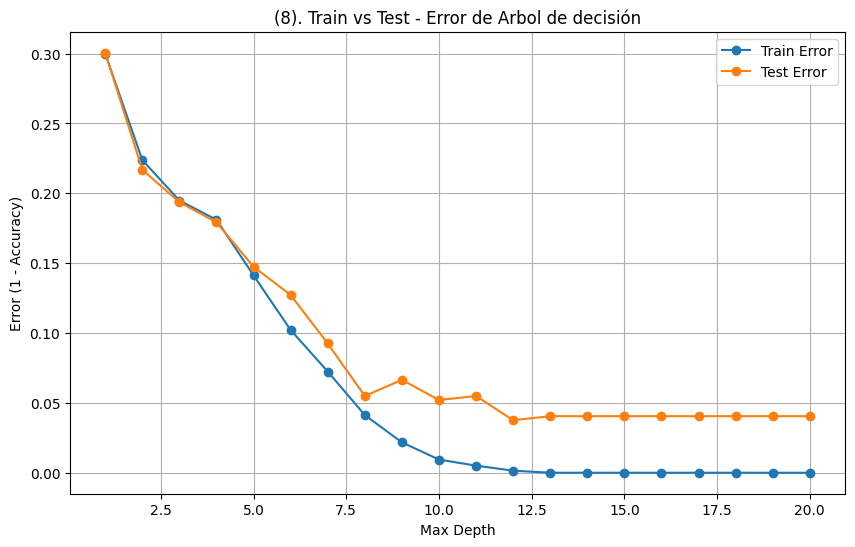

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, k_values + 1), train_error, label='Train Error', marker='o')
plt.plot(range(1, k_values + 1), generalization_error, label='Test Error', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Error (1 - Accuracy)')
plt.title('(8). Train vs Test - Error de Arbol de decisión')
plt.legend()
plt.grid(True)
plt.show()

> <span style="color:green"> **Ajuste Apropiado** </span>
> - Como se observa en la gráfica `(8) Train vs Test - Error de Arbol de decisión`, se ha aplicado un método de búsqueda exhaustiva para determinar el nivel óptimo de profundidad tomando `20` valores de profundidad a evaluar.
> - Este nivel se estabiliza en una profundidad de `12`, donde el modelo muestra un rendimiento consistente tanto en los datos de entrenamiento como en los de prueba, manteniendo un margen de error inferior al 5%.
> - *Aunque se ajusta mejor en `12` hemos tomado `8` niveles de profundidad para poder compararlo mejor con el modelo de random forest*.

<span style="color:green"> **Codificación implementada** </span>

In [28]:
#Código de ajuste del modelo de clasificación 2

# 2. Random Forest (Ensemble)
# Crear el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=50,         # Número de arboles
                                  criterion='gini',        # medida de impureza para dividir los nodos
                                  max_depth=8,             # profundidad máxima permitida de cada árbol
                                  class_weight='balanced', # Ajuste automático de pesos de cada clase
                                  random_state=SEED        # Semilla utilizada
                                  )

# Entrenar
rf_model.fit(X_train_encoded, y_train)

,n_estimators,50
,criterion,'gini'
,max_depth,8
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [29]:
print('(9). Error en entrenamiento:', 1 - rf_model.score(X_train_encoded, y_train))

(9). Error en entrenamiento: 0.036205648081100605


<span style="color:green"> **Justificación de los modelos seleccionados** </span>
- *Se han elegido dos algoritmos de clasificación que cumplen con el requisito del enunciado para la actividad.*

1. **Modelo 1: Árbol de Decisión (CART)**
- **Justificación**: Es un algoritmo interpretable, fácil de visualizar y adecuado para variables categóricas. Permite entender las reglas de decisión utilizadas en cada clase. Es bueno para problemas de clasificación multiclase como en este caso.
- **Ventajas**: Se puede interpretar, no requiere escalar los datos, maneja bien variables categóricas codificadas.
- **Desventajas**: Tendencia al sobreajuste (overfitting) si no se limita la profundidad por medio de la modificación de sus hiper parámetros, especialmente con clases desbalanceadas que es este caso.

2. **Modelo 2: Random Forest (RandomForestClassifier)**
- **Justificación**: Random Forest combina múltiples árboles de decisión entrenados con muestras aleatorias del dataset (bagging) y selección aleatoria de características. Esto reduce el sobreajuste y mejora la generalización.
- **Ventajas**: Mayor robustez que un árbol individual, mejor rendimiento en clases desbalanceadas, reduce varianza.
- **Desventajas**: Menor interpretabilidad que un árbol individual, y adicionalmente tiene un mayor coste computacional.
> Ambos modelos se ajustan a problemas de clasificación multiclase con variables categóricas codificadas.

## Evaluación de cada modelo

Al menos incluya:

+ Instancias clasificadas correctamente
+ Instancias clasificadas incorrectamente
+ TP Rate
+ FP Rate
+ Matriz de confusión

In [30]:
# Obtener los nombres de las columnas encoding
feature_names_encoded = enc.get_feature_names_out(X_train.columns)

# Convertir a lista
feature_names_encoded = feature_names_encoded.tolist()

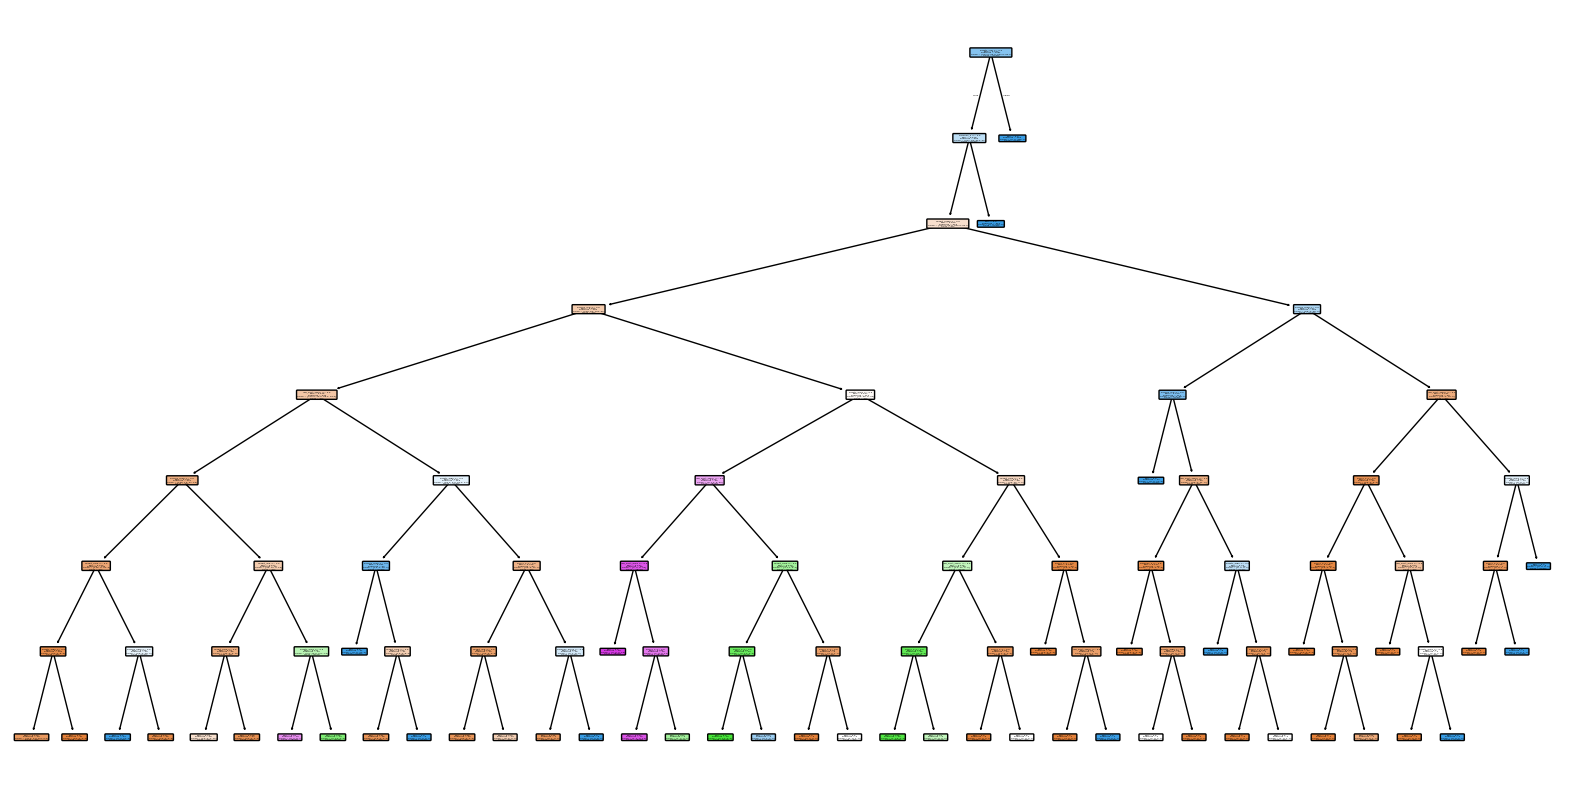

In [31]:
plt.figure(figsize=(20, 10))
plot_tree(
    tree_model,
    feature_names=feature_names_encoded,  # Ahora sí son los nombres correctos
    class_names=sorted(y.unique()),
    filled=True,
    rounded=True
)
plt.savefig('1.tree_model.png', dpi = 700)

In [32]:
print("Profundidad:", tree_model.get_depth())
print("Número de Hojas:", tree_model.get_n_leaves())

Profundidad: 8
Número de Hojas: 47


In [33]:
# --------------------------------
# Evaluación del modelo Árbol de Decisión
# --------------------------------

# Predecir las etiquetas para los datos de prueba
y_pred_tree = tree_model.predict(X_test_encoded)

print("(10). ====== Árbol de Decisión ======")

# Calcular y mostrar la exactitud (accuracy)
accuracy = accuracy_score(y_test, y_pred_tree)
print(f"(10.1). Accuracy: {accuracy * 100:.2f}%")

# Mostrar el reporte de clasificación con precision, recall, f1-score y soporte
print("(10.2). Clasificación:")
print(classification_report(y_test, y_pred_tree))

# Calcular la matriz de confusión
dt_cm = confusion_matrix(y_test, y_pred_tree)

# Calcular instancias clasificadas correctamente e incorrectamente
correct = dt_cm.trace()  # suma de la diagonal principal
incorrect = dt_cm.sum() - correct
print(f"(10.3). Instancias clasificadas correctamente: {correct}")
print(f"(10.4). Instancias clasificadas incorrectamente: {incorrect}")

# TP Rate = True Positive Rate = Recall
# FP Rate = False Positive Rate = FP / (FP + TN)
# Para FP Rate por clase:
FP = dt_cm.sum(axis=0) - np.diag(dt_cm)
TN = dt_cm.sum() - (FP + dt_cm.sum(axis=1) - np.diag(dt_cm) + np.diag(dt_cm))
FP_rate = FP / (FP + TN)
TP_rate = np.diag(dt_cm) / dt_cm.sum(axis=1)

for i, class_label in enumerate(tree_model.classes_):
    print(f"Clase '{class_label}': TP Rate (Recall) = {TP_rate[i]:.2f}, FP Rate = {FP_rate[i]:.2f}")

(10). ====== Árbol de Decisión ======
(10.1). Accuracy: 94.51%
(10.2). Clasificación:
              precision    recall  f1-score   support

         acc       0.87      0.92      0.89        77
        good       0.73      0.79      0.76        14
       unacc       0.99      0.96      0.97       242
       vgood       0.92      0.92      0.92        13

    accuracy                           0.95       346
   macro avg       0.88      0.90      0.89       346
weighted avg       0.95      0.95      0.95       346

(10.3). Instancias clasificadas correctamente: 327
(10.4). Instancias clasificadas incorrectamente: 19
Clase 'acc': TP Rate (Recall) = 0.92, FP Rate = 0.04
Clase 'good': TP Rate (Recall) = 0.79, FP Rate = 0.01
Clase 'unacc': TP Rate (Recall) = 0.96, FP Rate = 0.03
Clase 'vgood': TP Rate (Recall) = 0.92, FP Rate = 0.00


Construya un párrafo con los principales hallazgos.

<span style="color:green"> **Hallazgos - Árbol de Decisión** </span>
- Cuando los datos están desvalancesado, la exactitud (accuracy) no es una métrica relevante, ya que al tener más ejemplos de una clase, el modelo puede mostrar buen desepeño en la clase con más ejemplos, pero malo con la clase que tiene pocos ejemplos, en este caso, es más apropiado utilizar la métrica F1 score.
- **Precisión:** de los ejemplos que fueron clasificados en una clase, cuántos realmente pertenecen a esa clase.
- **Recall:** de los ejemplos que relamnete pertenecen a una clase, cúantos fueron correctamente identificados po rl modelo.
- El **F1-score:** se calcula a partir de la precisión y el recall, ponderándolos para obtener un valor balanceado que idelmante se acerque a 1.
- El Mapa de calor donde el azul más oscuro es igual a valores más altos.
- El **accuracy global:** es de **94.51%**, sobre *346 ejemplos* de prueba, sin embargo como ya habia identificado se observa un rendimiento desigual entre clases.
- La clase `unacc` presenta un **f1-score** alto **97.00%**, lo que indica que el modelo identifica correctamente la mayoria de coches inaceptables esto es devido a que fue entrenado en mayoria con ejemplo de esta clase.
- Las clase `vgood` muestran un **f1-score** alto **92.00%**, aunque fue entrenado con pocos ejemplos.
- La **matriz de confusión** revela que algunas instancias de `acc` se confunden con `unacc` y `acc`, y que unas copas instancias de `unacc` se confunden con `acc`.

In [34]:
#Código  para mostrarla evaluación del modelo de clasificación 2

# Importancia de las caracteristicas
rf_feature_importances = pd.DataFrame({
    "features": feature_names_encoded, 
    "importance": rf_model.feature_importances_
    }).sort_values("importance",
                   ascending=False)

# Mostrar importancia de caracteristicas de mayor a menor. 
rf_feature_importances

,features,importance
12,persons_2,0.123553
19,safety_low,0.112253
18,safety_high,0.106659
17,lug_boot_small,0.084067
20,safety_med,0.081053
0,buying_high,0.063243
1,buying_low,0.060637
7,maint_vhigh,0.059140
5,maint_low,0.050545
3,buying_vhigh,0.049173


In [35]:
# --------------------------------
# Predecir con los datos de prueba
# --------------------------------

y_pred_rf = rf_model.predict(X_test_encoded)

# 2. Modelo Random Forest
print("(11). ====== Random Forest ======")

print(f"(11.1). Accuracy: {accuracy_score(y_test, y_pred_rf) * 100:.2f}%")

print("(11.2). Clasificación:")
print(classification_report(y_test, y_pred_rf))

(11). ====== Random Forest ======
(11.1). Accuracy: 95.95%
(11.2). Clasificación:
              precision    recall  f1-score   support

         acc       0.92      0.94      0.93        77
        good       0.79      0.79      0.79        14
       unacc       1.00      0.98      0.99       242
       vgood       0.72      1.00      0.84        13

    accuracy                           0.96       346
   macro avg       0.86      0.92      0.89       346
weighted avg       0.96      0.96      0.96       346



Construya un párrafo con los principales hallazgos.

<span style="color:green"> **Hallazgos - Random Forest** </span>
- El modelo de Random Forest muestra un **accuracy global superior** **95.95%** al del Árbol de Decisión, lo que confirma la ventaja de las técnicas ensemble para reducir el sobreajuste y mejorar la generalización.
- La clase **`unacc`** sigue siendo la mejor clasificada, con un **f1-score** alto **99.00%**.
- La clase **`vgood`** pierde un poco de mejoría represntando un **f1-score** de **84.00%**.
- La **matriz de confusión** muestra menos confusiones entre clases que en el modelo anterior, especialmente en las clases minoritarias.
- Random Forest demuestra ser más robusto frente al desbalanceo de clases y ofrece predicciones más consistentes en todas las categorías.

## Comparación del desempeño de modelos

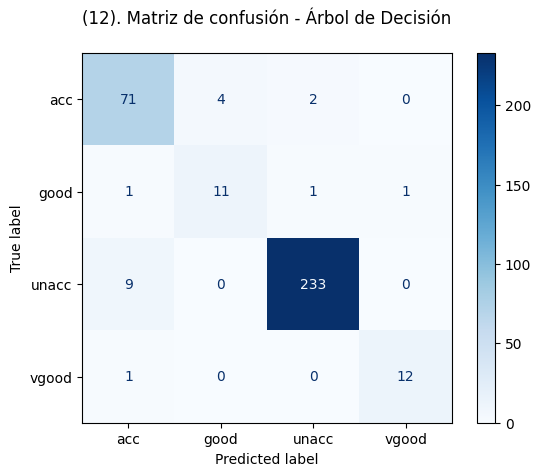

In [36]:
disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm,
                              display_labels=tree_model.classes_)
disp.plot(cmap='Blues')
plt.title("(12). Matriz de confusión - Árbol de Decisión\n")
plt.show()

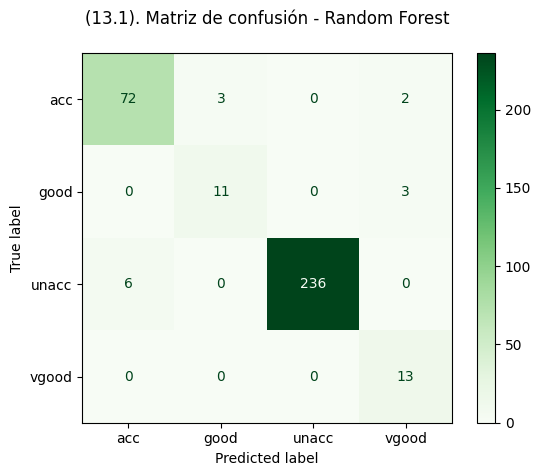

In [37]:
#Código para mostrar la comparación de métricas de desempeño de las dos propuestas en tabla

rf_cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm,
                              display_labels=rf_model.classes_)
disp.plot(cmap='Greens')
plt.title("(13.1). Matriz de confusión - Random Forest\n")
plt.show()

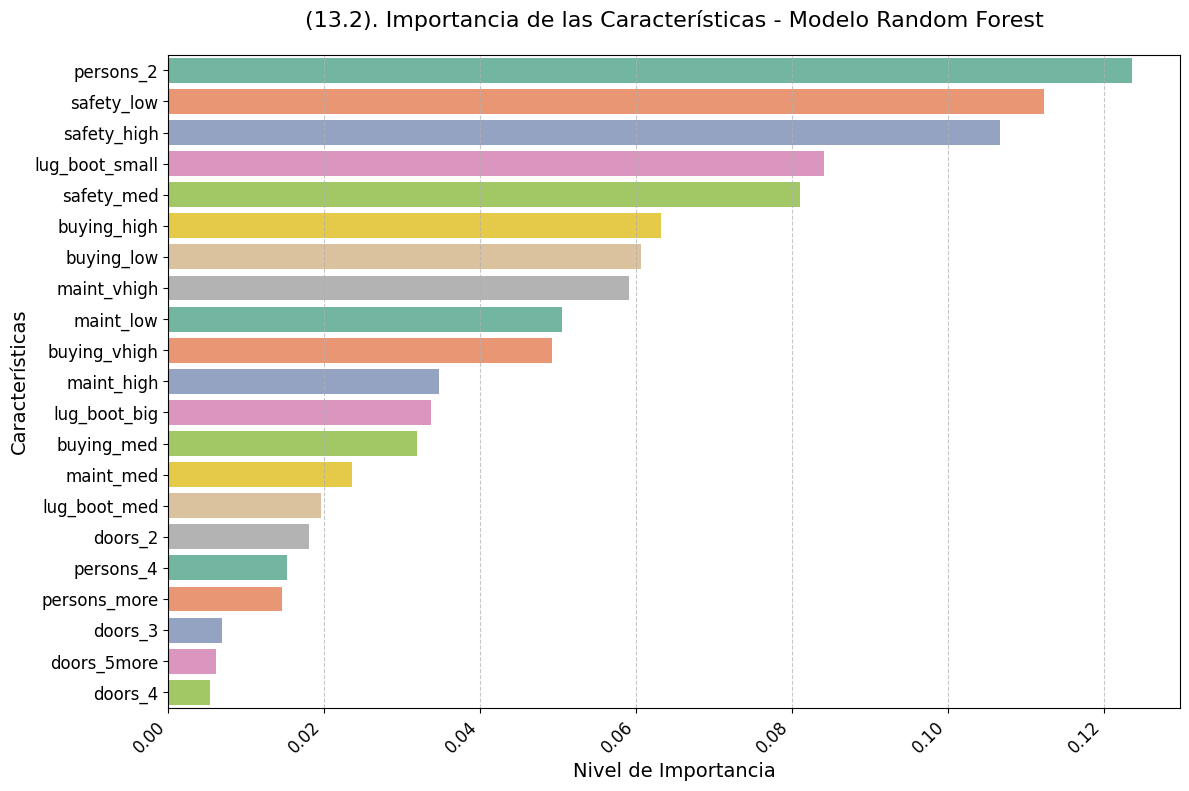

In [38]:
#Código para mostrar la comparación de métricas de desempeño de las dos propuestas en gráfica

# Gráfico de barras para mostrar la importancia de las características
plt.figure(figsize=(12, 8))  # Tamaño del gráfico

sns.barplot(
    x='importance',
    y='features',
    hue='features',          
    data=rf_feature_importances,
    palette='Set2',              # Paleta de colores atractiva
    legend=False                 
)

# Etiquetas y título
plt.title('(13.2). Importancia de las Características - Modelo Random Forest', fontsize=16, y=1.03)
plt.xlabel('Nivel de Importancia', fontsize=14)
plt.ylabel('Características', fontsize=14)

# Rotación y estilo de las etiquetas del eje X
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Agregar rejilla para facilitar la lectura
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Ajustar diseño
plt.tight_layout()

# Mostrar
plt.show()

Construya un párrafo con los principales hallazgos.

## Discusión de los resultados obtenidos y argumentos sobre cómo se podrían mejorar de dichos resultados

Realice en este espacio todo el análsis de resultados final incluyendo: ventajas y desventajas de cada modelo propuesto, Resultados comparados. Conclusiones objetivas y significantes con base a las diferentes métricas escogidas. Recomendaciones de mejora de las propuestas: 

<span style="color:green"> **Discusión de resultados y propuestas de mejora** </span>

1. **Ventajas y desventajas de cada modelo**

1.1. **Árbol de Decisión (DecisionTreeClassifier)**

**Ventajas:**
- **Alta interpretabilidad**: permite visualizar las reglas de decisión y entender qué características son más importantes para la clasificación.
- **Rápido de entrenar**: requiere menos recursos computacionales que Random Forest.
- **No requiere escalado de datos**: funciona directamente con variables codificadas.

**Desventajas:**
- **Tendencia al sobreajuste**: especialmente en clases desbalanceadas, puede recordar patrones del conjunto ee entrenamiento que no generalizan bien.
- **Menor rendimiento en clases minoritarias**: como se observó en los resultados, tiene dificultades para identificar correctamente las clases `good` y `vgood`.
- **Alta varianza**: pequeños cambios en los datos de entrenamiento pueden producir árboles diferentes.

1.2. **Random Forest (RandomForestClassifier)**

**Ventajas:**
- **Mayor robustez y generalización**: al combinar múltiples árboles, reduce el sobreajuste y mejora la capacidad de predicción en datos no vistos.
- **Mejor manejo del desbalanceo de clases**: ofrece mejor rendimiento en clases minoritarias que un árbol individual.
- **Reducción de varianza**: al promediar las predicciones de múltiples árboles, las predicciones son más estables.

**Desventajas:**
- **Menor interpretabilidad**: es más difícil entender las reglas de decisión que en un árbol individual.
- **Mayor coste computacional**: requiere más tiempo de entrenamiento y más memoria.
- **Más hiperparámetros que ajustar**: requiere optimización de `n_estimators`, `max_depth`, `class_weight`.

2. **Conclusiones**

- **Random Forest es el modelo ganador**: supera al Árbol de Decisión en su diagonal princiapl de verdaderos positivos, pero en este caso tambien genero diferencias en acierto.
- **El desbalanceo de clases afecta a ambos modelos**, pero Random Forest lo maneja mejor, especialmente en las clases minoritarias (`good`, `vgood`).
- **La clase `unacc` es la mejor clasificada** en ambos modelos debido a su alta frecuencia en el dataset (aproximadamente 70% de las instancias).
- **Las matrices de confusión** muestran que las principales confusiones ocurren entre clases adyacentes en términos de aceptabilidad (por ejemplo, `acc` con `good` y `vgood`).

3. **Propuestas de mejora**

Para mejorar el rendimiento de ambos modelos, se proponen las siguientes estrategias:

- **Técnicas de balanceo de clases**
  - **Oversampling de clases minoritarias** (SMOTE): generar instancias sintéticas de las clases `good` y `vgood` para equilibrar el dataset.
  - **Undersampling de la clase mayoritaria**: reducir el número de instancias de `unacc` para equilibrar las proporciones.

- **Optimización de hiperparámetros**
  - **Grid Search o Random Search**: realizar búsqueda exhaustiva de los mejores hiperparámetros (`max_depth`, `min_samples_split`, `n_estimators`).

- **Probar otros algoritmos**
  - **Gradient Boosting (XGBoost, LightGBM)**: técnicas ensemble más avanzadas que suelen ofrecer mejor rendimiento en problemas de clasificación con desbalanceo.
  
4. **Conclusión final**

El análisis realizado demuestra que **Random Forest es el modelo más adecuado** para este problema de clasificación de aceptabilidad de coches, superando al Árbol de Decisión. Sin embargo, ambos modelos tienen margen de mejora, especialmente en las clases minoritarias.

In [39]:
# ------------------
# Probar los modelos
# -----------------
mis_datos = pd.DataFrame({
    "buying": ["low"],
    "maint": ["low"],
    "doors": ["2"],
    "persons": ["4"],
    "lug_boot": ["big"],
    "safety": ["high"]
})

# Codificar mis_datos con el mismo codificador
mis_datos_encoded = enc.transform(mis_datos)

# ---------------------------------------------------
# Predecir Arboles de Desición
predicciones = tree_model.predict(mis_datos_encoded)

# Mostrar resultados
for i, pred in enumerate(predicciones):
    print(f"(Arboles de Desición): Ejemplo {i + 1}: Predicción = {pred}")

# ---------------------------------------------------
# Predecir Random Forest
predicciones = rf_model.predict(mis_datos_encoded)

# Mostrar resultados
for i, pred in enumerate(predicciones):
    print(f"(Random Forest): Ejemplo {i + 1}: Predicción = {pred}")


(Arboles de Desición): Ejemplo 1: Predicción = vgood
(Random Forest): Ejemplo 1: Predicción = vgood
